In [1]:
import json
import string
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
with open('/content/Mental Health Conversational.json', 'r') as content:
  chatbot = json.load(content)
data = pd.DataFrame(chatbot['intents'])

In [4]:
dictionary = {"tag":[], "patterns":[], "responses":[]}
for i in range (len(data)):
  pattern = data[data.index==i]['patterns'].values[0]
  response = data[data.index==i]['responses'].values[0]
  tag = data[data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionary['tag'].append(tag)
    dictionary['patterns'].append(pattern[j])
    dictionary['responses'].append(response)
data = pd.DataFrame.from_dict(dictionary)
data

,tag,patterns,responses
0,greeting,Hai,[Halo! Selamat bertemu denganmu. Bagaimana kab...
1,greeting,Halo,[Halo! Selamat bertemu denganmu. Bagaimana kab...
2,greeting,Hai apa kabar?,[Halo! Selamat bertemu denganmu. Bagaimana kab...
3,greeting,"Hai, yang di sana",[Halo! Selamat bertemu denganmu. Bagaimana kab...
4,greeting,Halo,[Halo! Selamat bertemu denganmu. Bagaimana kab...
...,...,...,...
226,fact_29,Bagaimana saya tahu kalau saya tidak sehat?,"[Jika keyakinan, pikiran, perasaan, atau peril..."
227,fact_30,Bagaimana saya bisa menjaga hubungan sosial? B...,"[Banyak orang yang sendirian saat ini, tapi ki..."
228,fact_31,Apa perbedaan antara kecemasan dan stres?,[Stres dan kecemasan sering digunakan secara b...
229,fact_32,Apa perbedaan antara kesedihan dan depresi?,[Kesedihan merupakan reaksi normal terhadap ke...


In [5]:
data['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'about', 'skill', 'creation', 'help', 'sad', 'stressed',
       'worthless', 'depressed', 'happy', 'casual', 'anxious',
       'not-talking', 'sleep', 'scared', 'death', 'understand', 'done',
       'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat',
       'wrong', 'stupid', 'location', 'something-else', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user_meditation', 'hugu_useful', 'user-advice',
       'learn_mental_health', 'mental_health_fact', 'fact_1', 'fact_2',
       'fact_3', 'fact_4', 'fact_5', 'fact_6', 'fact_7', 'fact_8',
       'fact_9', 'fact_10', 'fact_11', 'fact_12', 'fact_13', 'fact_14',
       'fact_15', 'fact_16', 'fact_17', 'fact_18', 'fact_19', 'fact_20',
       'fact_21', 'fact_22', 'fact_23', 'fact_24', 'fact_25', 'fact_26',
       'fact_27', 'fact_28', 'fact_29', 'fact_30', 'fact_31', 'fact_32'],
      dtype=object)

In [6]:
tokenizer = Tokenizer(lower=True, split=' ', oov_token='<OOV>')
tokenizer.fit_on_texts(data['patterns'])
tokenizer.get_config()

vocab = len(tokenizer.word_index)
print("Unique word : ",vocab)

pattern_train = tokenizer.texts_to_sequences(data['patterns'])
x_train = pad_sequences(pattern_train, padding="post")
print("Input shape : ", x_train.shape)

print()
label_encode = LabelEncoder()
y_train = label_encode.fit_transform(data['tag'])
print("Label shape : ", y_train.shape)
print("Output length : ", len(np.unique(y_train)))

Unique word :  289
Input shape :  (231, 18)

Label shape :  (231,)
Output length :  77


In [7]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-12-07 08:38:41--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-07 08:38:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1       55%[==========>         ] 452.32M  4.91MB/s    eta 73s    ^C
Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
glove_dir = "/content/glove.6B.100d.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding='utf8')
for line in file_:
  arr = line.split()
  single_word = arr[0]
  w = np.asarray(arr[1:],dtype='float32')
  embeddings_index[single_word] = w
file_.close()
print(len(embeddings_index))

400000


In [9]:
max = vocab + 1
word_index =tokenizer.word_index
embedding_mat = np.zeros((max, 100)).astype(object)
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_mat[i] = embedding_vector

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_length=x_train.shape[1], input_dim=vocab+1, output_dim = 100, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

model.summary()
model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 18, 100)           29000     
                                                                 
 bidirectional_15 (Bidirect  (None, 18, 128)           84480     
 ional)                                                          
                                                                 
 layer_normalization_25 (La  (None, 18, 128)           256       
 yerNormalization)                                               
                                                                 
 bidirectional_16 (Bidirect  (None, 18, 128)           98816     
 ional)                                                          
                                                                 
 layer_normalization_26 (La  (None, 18, 128)           256       
 yerNormalization)                                    

In [35]:
history = model.fit(x_train, y_train,
                    batch_size=10, epochs=30)

Epoch 1/30
24/24 [==============================] - 28s 29ms/step - loss: 4.7960 - accuracy: 0.0346
Epoch 2/30
24/24 [==============================] - 1s 29ms/step - loss: 3.6159 - accuracy: 0.1255
Epoch 3/30
24/24 [==============================] - 1s 28ms/step - loss: 2.8727 - accuracy: 0.3160
Epoch 4/30
24/24 [==============================] - 1s 30ms/step - loss: 2.5605 - accuracy: 0.3939
Epoch 5/30
24/24 [==============================] - 1s 30ms/step - loss: 2.2619 - accuracy: 0.4978
Epoch 6/30
24/24 [==============================] - 1s 31ms/step - loss: 1.8833 - accuracy: 0.5455
Epoch 7/30
24/24 [==============================] - 1s 52ms/step - loss: 1.6378 - accuracy: 0.5974
Epoch 8/30
24/24 [==============================] - 1s 54ms/step - loss: 1.4191 - accuracy: 0.6407
Epoch 9/30
24/24 [==============================] - 1s 53ms/step - loss: 1.2808 - accuracy: 0.6797
Epoch 10/30
24/24 [==============================] - 1s 31ms/step - loss: 1.1204 - accuracy: 0.7403
Epoch 11

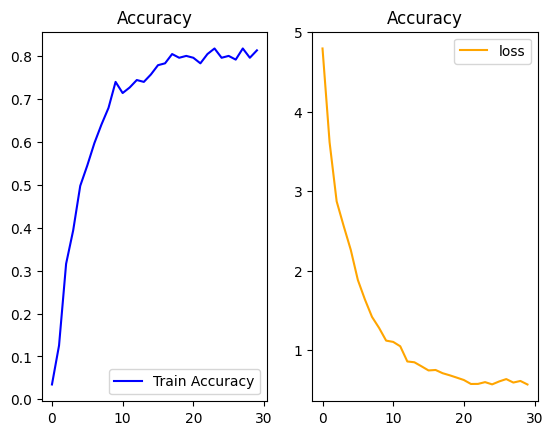

In [36]:
# LSTM
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color ='blue')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='orange')
plt.legend(loc='upper right')
plt.title('Accuracy')
plt.show()

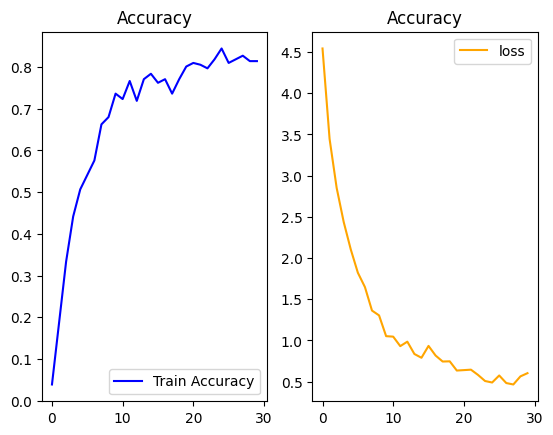

In [30]:
# GRU
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color ='blue')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='orange')
plt.legend(loc='upper right')
plt.title('Accuracy')
plt.show()

In [37]:
def chatbot_test():
  while True:
    user_input = input("User: ")

    pattern_test = tokenizer.texts_to_sequences([user_input])
    x_test = pad_sequences(pattern_test, padding="post")

    prediction = model.predict(x_test)[0]
    label = label_encode.inverse_transform([np.argmax(prediction)])[0]
    response = data[data['tag'] == label]['responses'].values[0]

    print("Chatbot: ", format(random.choice(response)))
    if label=='goodbye' or label=='thanks':
      break


In [38]:
chatbot_test()

User: halo
1/1 [==============================] - 8s 8s/step
Chatbot:  Halo! Senang bertemu denganmu. Apa yang bisa saya bantu?
User: apa kamu dapat menjelaskan apa itu kesehatan mental?


1/1 [==============================] - 8s 8s/step
Chatbot:  Penyakit mental (mental disorder), disebut juga dengan gangguan mental atau jiwa, adalah kondisi kesehatan yang memengaruhi pemikiran, perasaan, perilaku, suasana hati, atau kombinasi diantaranya.
User: siapa kamu
1/1 [==============================] - 0s 30ms/step
Chatbot:  Saya Hugu. Saya adalah agen percakapan yang dirancang untuk meniru seorang terapis. Jadi, bagaimana perasaan Anda hari ini?
User: apa yang dapat kamu lakukan
1/1 [==============================] - 0s 42ms/step
Chatbot:  Saya sangat minta maaf. Mari kita coba lagi.
User: Apa yang dapatanda lakukan
1/1 [==============================] - 0s 28ms/step
Chatbot:  Psikolog secara umum adalah seorang ahli psikologi, bidang ilmu pengetahuan yang mempelajari tingkah laku dan proses mental.
User: Apa yang dapat anda lakukan
1/1 [==============================] - 0s 36ms/step
Chatbot:  Saya dapat memberikan nasihat umum mengenai kecemasan dan depresi, menjawab pertany

KeyboardInterrupt: ignored

In [40]:
model.save("model_chatbot.h5")